# Sentiment Analysis

## Introduction

So far, all of the analysis we've done has been pretty generic - looking at counts, creating scatter plots, etc. These techniques could be applied to numeric data as well.

When it comes to text data, there are a few popular techniques that we'll be going through in the next few notebooks, starting with sentiment analysis. A few key points to remember with sentiment analysis.

1. **TextBlob Module:** Linguistic researchers have labeled the sentiment of words based on their domain expertise. Sentiment of words can vary based on where it is in a sentence. The TextBlob module allows us to take advantage of these labels.
2. **Sentiment Labels:** Each word in a corpus is labeled in terms of polarity and subjectivity (there are more labels as well, but we're going to ignore them for now). A corpus' sentiment is the average of these.
   * **Polarity**: How positive or negative a word is. -1 is very negative. +1 is very positive.
   * **Subjectivity**: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.

For more info on how TextBlob coded up its [sentiment function](https://planspace.org/20150607-textblob_sentiment/).

Let's take a look at the sentiment of the various transcripts, both overall and throughout the comedy routine.

## Sentiment of Routine

In [1]:
# We'll start by reading in the corpus, which preserves word order
import pandas as pd

data = pd.read_pickle('./pickle/corpus.pkl')
data

,transcript,full_name
ali,"Ladies and gentlemen, please welcome to the st...",Ali Wong
anthony,"Thank you. Thank you. Thank you, San Francisco...",Anthony Jeselnik
bill,"[cheers and applause] All right, thank you! Th...",Bill Burr
dave,This is Dave. He tells dirty jokes for a livin...,Dave Chappelle
jim,[Car horn honks] [Audience cheering] [Announce...,Jim Jefferies
joe,[rock music playing] [audience cheering] [anno...,Joe Rogan
john,"All right, Petunia. Wish me luck out there. Yo...",John Mulaney
louis,Intro\nFade the music out. Let’s roll. Hold th...,Louis C.K.
mike,"Wow. Hey, thank you. Thanks. Thank you, guys. ...",Mike Birbiglia
ricky,Hello. Hello! How you doing? Great. Thank you....,Ricky Gervais


In [2]:
data.transcript.loc['dave']

'This is Dave. He tells dirty jokes for a living. That stare is where most of his hard work happens. It signifies a profound train of thought, the alchemist’s fire that transforms fear and tragedy into levity and livelihood. Dave calls that look “the trance.” ♪ Play me ♪\n♪ Buy me ♪\n♪ Workinonit ♪\n♪ Tune up ♪\n♪ Tune ♪\n♪ Oh ♪\n ♪ Fade me ♪\n♪ Ah-ah, ah-ah, ah-ah ♪\n♪ In every ghetto ♪\n♪ Ah-ah, ah-ah, ah-ah ♪\n♪ In every ghetto ♪\n♪ Ah-ah, ah-ah, ah-ah ♪\n♪ In every ghetto ♪\n♪ Ah-ah, ah-ah, ah-ah ♪\n♪ In every ghetto ♪\n♪ Ah-ah, ah-ah, ah-ah ♪\n♪ In every ghetto ♪\n♪ Ah-ah, ah-ah, ah-ah ♪\n♪ In every ghetto ♪\n♪ Ah-ah, ah-ah, ah-ah ♪ Thank you! Thank you very much! Thank you all. Oh, wow. That was exciting, wasn’t it? Thank you, guys. Have a seat, feel comfortable, relax. I want to thank everyone in LA for a wonderful week. It’s been great here. You know what? It’s been ten years since the last time I played Los Angeles, if you can imagine. I know! I know, I’ve been gone for a very

In [4]:
!pip install textblob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 626.3/626.3 kB 9.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 9.8 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: nltk
    Found existing installation: nltk 3.7
    Uninstalling nltk-3.7:
      Successfully uninstalled nltk-3.7


In [5]:
from textblob import TextBlob

In [6]:
text1 = 'stupid liberals absolutely crushed cold blood conservatives'
blob = TextBlob(text1)
blob.sentiment

Sentiment(polarity=-0.5, subjectivity=0.7000000000000001)

In TextBlob, polarity ranges from -1.0 to 1.0 and indicates the positivity of the sentiment; subjectivity ranges from 0 to 1 and quantifies the amount of personal opinion in the text

In [7]:
text2 = 'pandas is the standard tool for data analysis in python'
TextBlob(text2).sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [8]:
# Create quick lambda functions to find the polarity and subjectivity of each routine

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

In [9]:
data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

,transcript,full_name,polarity,subjectivity
ali,"Ladies and gentlemen, please welcome to the st...",Ali Wong,0.069359,0.482403
anthony,"Thank you. Thank you. Thank you, San Francisco...",Anthony Jeselnik,0.054285,0.559732
bill,"[cheers and applause] All right, thank you! Th...",Bill Burr,0.016479,0.537016
dave,This is Dave. He tells dirty jokes for a livin...,Dave Chappelle,-0.004069,0.513958
jim,[Car horn honks] [Audience cheering] [Announce...,Jim Jefferies,0.044224,0.523382
joe,[rock music playing] [audience cheering] [anno...,Joe Rogan,0.039378,0.547370
john,"All right, Petunia. Wish me luck out there. Yo...",John Mulaney,0.082355,0.484137
louis,Intro\nFade the music out. Let’s roll. Hold th...,Louis C.K.,0.056665,0.515796
mike,"Wow. Hey, thank you. Thanks. Thank you, guys. ...",Mike Birbiglia,0.092927,0.518476
ricky,Hello. Hello! How you doing? Great. Thank you....,Ricky Gervais,0.066489,0.497313


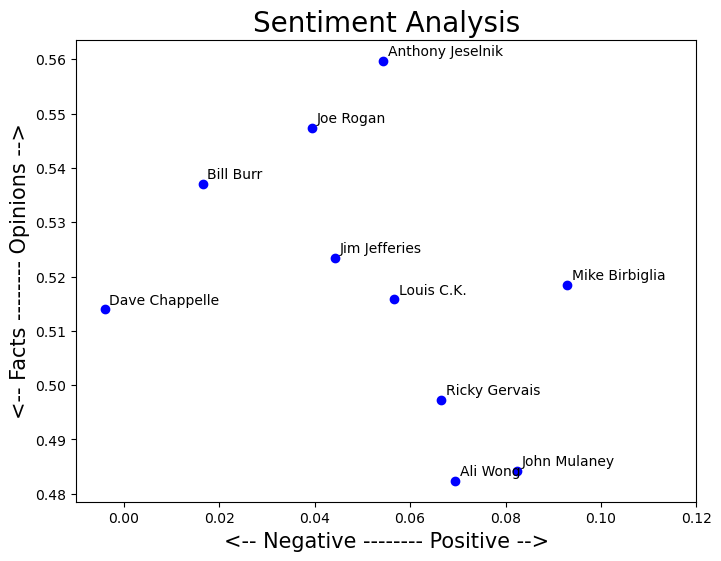

In [10]:
# Let's plot the results
import matplotlib.pyplot as plt
# Allows charts to appear in the notebook
%matplotlib inline

plt.rcParams['figure.figsize'] = [8, 6]

for index, comedian in enumerate(data.index):
    x = data.polarity.loc[comedian]
    y = data.subjectivity.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['full_name'][index], fontsize=10)
    plt.xlim(-.01, .12) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

## Sentiment Over Time

Instead of looking at the overall sentiment, let's see if there's anything interesting about the sentiment over time throughout each show.

In [11]:
import numpy as np
np.arange(0, 1000, 100)

array([  0, 100, 200, 300, 400, 500, 600, 700, 800, 900])

In [12]:
# Split each transcript into 10 parts
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [13]:
# Let's take a look at our data again
data

,transcript,full_name,polarity,subjectivity
ali,"Ladies and gentlemen, please welcome to the st...",Ali Wong,0.069359,0.482403
anthony,"Thank you. Thank you. Thank you, San Francisco...",Anthony Jeselnik,0.054285,0.559732
bill,"[cheers and applause] All right, thank you! Th...",Bill Burr,0.016479,0.537016
dave,This is Dave. He tells dirty jokes for a livin...,Dave Chappelle,-0.004069,0.513958
jim,[Car horn honks] [Audience cheering] [Announce...,Jim Jefferies,0.044224,0.523382
joe,[rock music playing] [audience cheering] [anno...,Joe Rogan,0.039378,0.547370
john,"All right, Petunia. Wish me luck out there. Yo...",John Mulaney,0.082355,0.484137
louis,Intro\nFade the music out. Let’s roll. Hold th...,Louis C.K.,0.056665,0.515796
mike,"Wow. Hey, thank you. Thanks. Thank you, guys. ...",Mike Birbiglia,0.092927,0.518476
ricky,Hello. Hello! How you doing? Great. Thank you....,Ricky Gervais,0.066489,0.497313


In [14]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)

In [15]:
list_pieces[1]

['Thank you. Thank you. Thank you, San Francisco. Thank you so much. So good to be here. People were surprised when I told ’em I was gonna tape my special in San Francisco. Said, “Why would you do that? That’s the most politically correct city in the world.” Not when I’m on stage, it’s not. I love this place. One of my favorite cities to perform in. It’s a good place to hang out. Got to walk around a little bit today. Saw a baby. Saw a baby locked inside the back of a hot car. So it’s been a great day. Love that. Don’t get me wrong. I’m not a monster. I tried to help the baby. Tried to throw a rock through the window. Window was down. Ruined that baby’s whole weekend. It was worth it. I love San Francisco. One of my favorite things is how beautiful all the women are here. Yeah. Women in San Francisco are gorgeous. I say that despite what’s… going on in this crowd tonight. But you guys live here. You guys live here. You’ve seen ’em. I was in a bar last night, saw this beautiful woman. L

In [16]:
# Each transcript has been split into 10 pieces of text
len(list_pieces[0])

10

In [17]:
# The list has 10 elements, one for each transcript
len(list_pieces)

10

In [18]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.11168482647296207,
  0.056407029478458055,
  0.09445691155249979,
  0.09236886724386723,
  -0.014671592775041055,
  0.09538361348808912,
  0.06079713127248339,
  0.08721655328798185,
  0.030089690638160044,
  0.07351994851994852],
 [0.13933883477633482,
  -0.06333451704545455,
  -0.056153799903799935,
  0.014602659245516405,
  0.16377334420812684,
  0.09091338259441709,
  0.09420031055900621,
  0.11566683919944787,
  -0.05070608684245053,
  0.058467487373737366],
 [-0.0326152022580594,
  0.006825656825656827,
  0.023452001215159095,
  0.01934081890331888,
  -0.026312183887941466,
  0.06207506613756614,
  0.030250682288725742,
  -0.020351594027441484,
  -0.01150485008818343,
  0.10757491470108295],
 [-0.05093449586407334,
  -0.07101471980837788,
  0.035829891691960644,
  0.08313791054959534,
  -0.026718682968682954,
  0.09782737058599124,
  -0.12493321942974718,
  -0.08041766347687401,
  -0.06019759281122916,
  0.15191938178780284],
 [0.09480343501984131,
  0.10371625923096511,
  0.

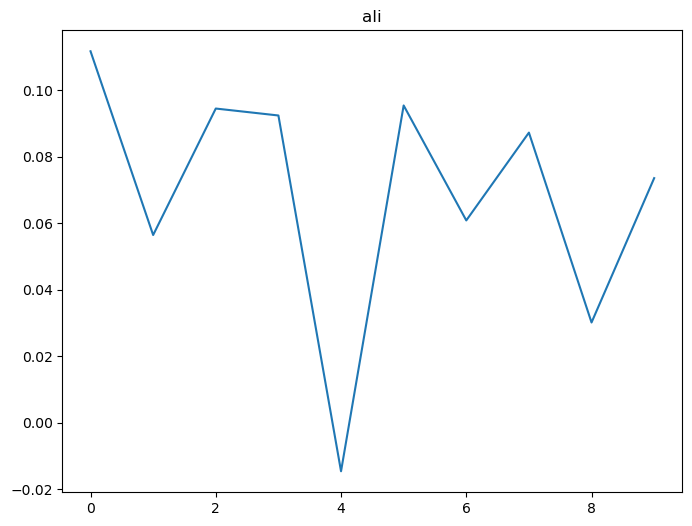

In [19]:
# Show the plot for one comedian
plt.plot(polarity_transcript[0])
plt.title(data['full_name'].index[0])
plt.show()

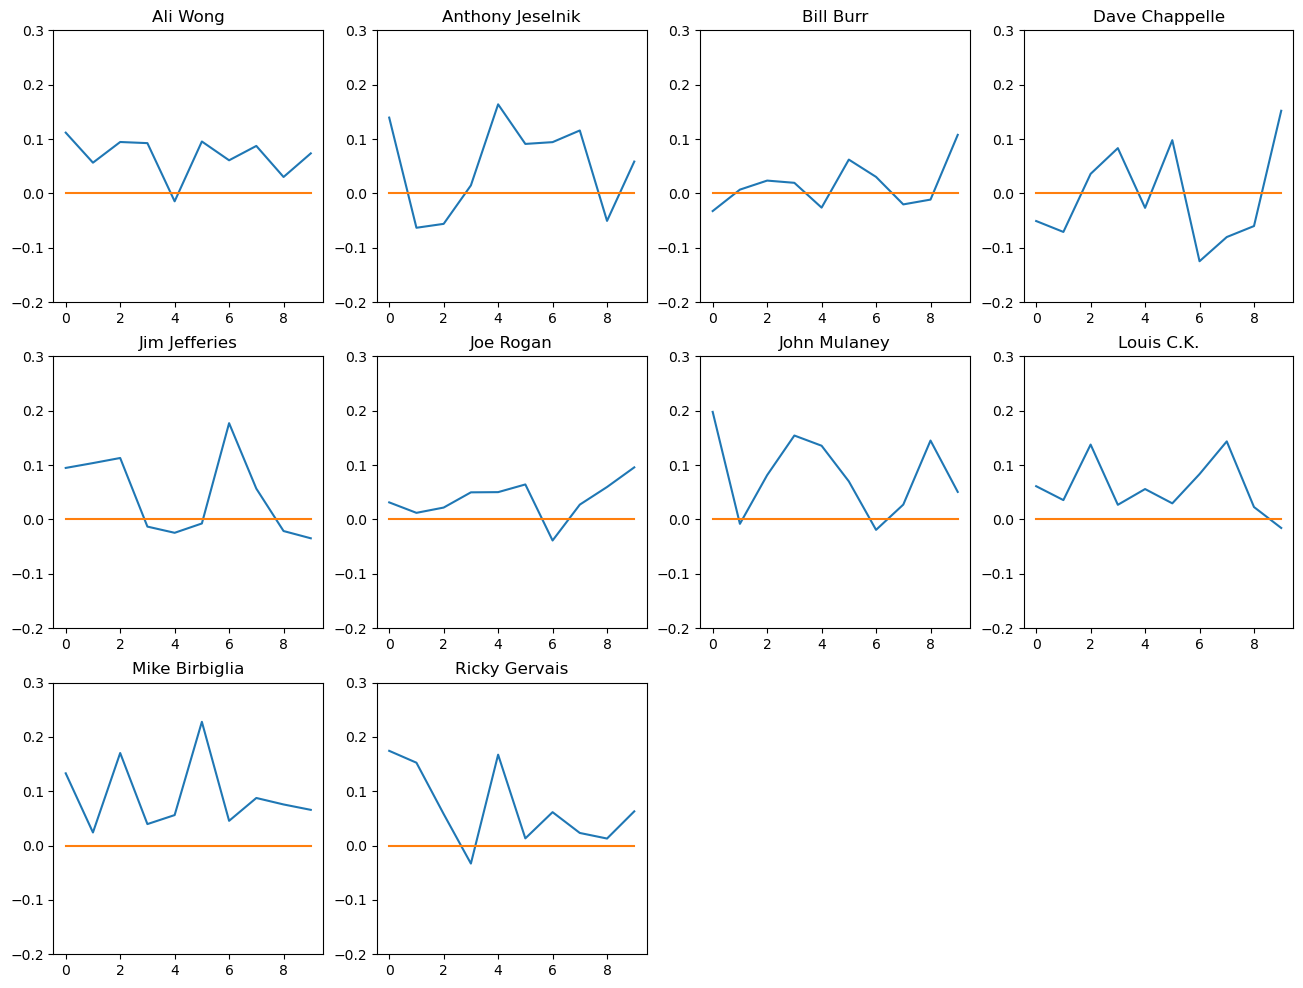

In [20]:
# Show the plot for all comedians
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()

Now let's have a more granular look at the sentiments

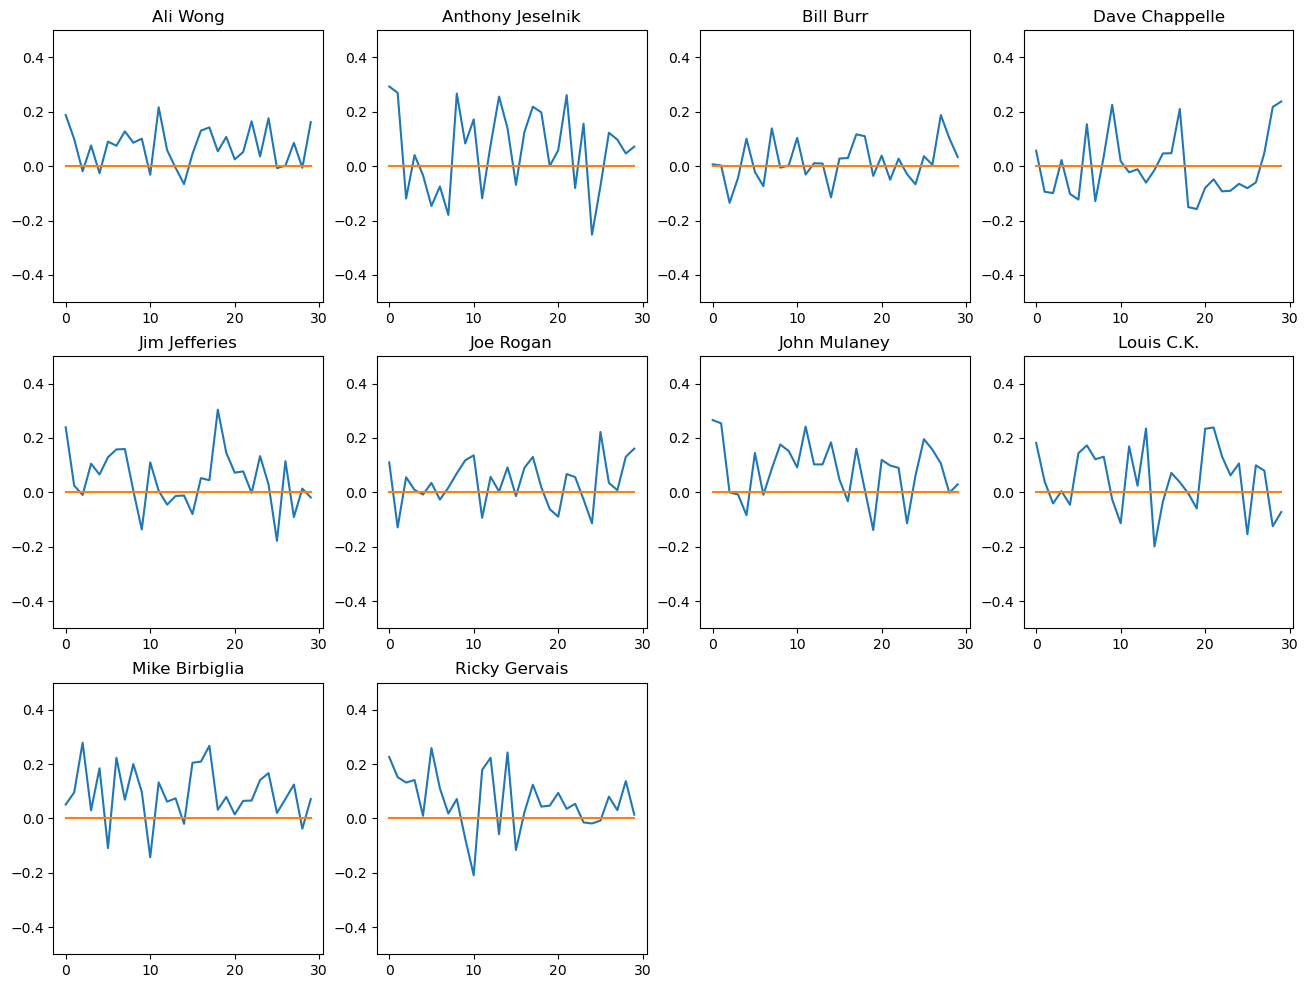

In [21]:
list_pieces_2 = []
for t in data.transcript:
    split = split_text(t, n = 30)
    list_pieces_2.append(split)
    
polarity_transcript_2 = []
for lp in list_pieces_2:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript_2.append(polarity_piece)
    

plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript_2[index])
    plt.plot(np.arange(0,30), np.zeros(30))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.5, ymax=.5)
    
plt.show()

A more granular view reveals that there are more extreme moments than we realized. 

## Next Steps

- Try OpenAI API(tutorial 3) and compare